https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

https://www.math.u-bordeaux.fr/~pmagal100p/papers/MW-JMB-2018.pdf
    

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

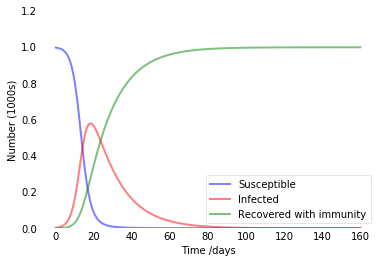

In [2]:
# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 3, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.5, 1./14
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, 
             args=(N, beta, gamma))

S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure()
ax = fig.add_subplot(111, 
                     #axis_bgcolor='#dddddd', 
                     axisbelow=True)

ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

$\nu = \nu_1 + \nu_2$

In [28]:
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
nu = 1/7
tau, nu1,nu2, eta = .2, 0.2*nu, .8*nu, 1./7
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, tau, nu1,nu2, eta):
    S, I, R, U = y
    dSdt = -tau * S * (I + U) / N
    dIdt = tau * S * (I + U) / N - gamma * I
    dRdt = nu1 * I - eta * R
    dUdt = nu2 * I - eta * U
    return dSdt, dIdt, dRdt, dUdt

# Initial conditions vector
S0 = N
I0 = 3
R0 = U0 = 0
y0 = S0, I0, R0, U0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, 
             args=(N,  tau, nu1,nu2, eta))

S, I, R, U = ret.T/N

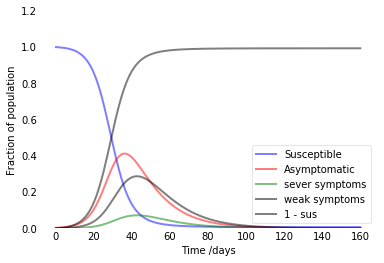

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, 
                     #axis_bgcolor='#dddddd', 
                     axisbelow=True)

ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Asymptomatic')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='sever symptoms')
ax.plot(t, U, 'k', alpha=0.5, lw=2, label='weak symptoms')
ax.plot(t, 1 - S, 'k', alpha=0.5, lw=2, label='1 - sus')

ax.set_xlabel('Time /days')
ax.set_ylabel('Fraction of population')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [23]:
S

array([9.97000000e+02, 9.95122026e+02, 9.92245646e+02, 9.87852238e+02,
       9.81169978e+02, 9.71071379e+02, 9.55956621e+02, 9.33657879e+02,
       9.01449455e+02, 8.56317986e+02, 7.95685772e+02, 7.18652923e+02,
       6.27382465e+02, 5.27669063e+02, 4.27766903e+02, 3.35759626e+02,
       2.57101471e+02, 1.93759866e+02, 1.44932962e+02, 1.08361309e+02,
       8.14144794e+01, 6.16977242e+01, 4.72744598e+01, 3.66769777e+01,
       2.88324089e+01, 2.29713108e+01, 1.85464655e+01, 1.51693123e+01,
       1.25631721e+01, 1.05299225e+01, 8.92664169e+00, 7.64935245e+00,
       6.62172155e+00, 5.78718438e+00, 5.10342851e+00, 4.53850608e+00,
       4.06807308e+00, 3.67341346e+00, 3.34001320e+00, 3.05652278e+00,
       2.81399574e+00, 2.60532539e+00, 2.42482465e+00, 2.26791019e+00,
       2.13086307e+00, 2.01064618e+00, 1.90476377e+00, 1.81115275e+00,
       1.72809801e+00, 1.65416594e+00, 1.58815199e+00, 1.52903904e+00,
       1.47596414e+00, 1.42819178e+00, 1.38509233e+00, 1.34612458e+00,
      

999.0413071700651